In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.Read the data

In [2]:
cars=pd.read_csv("ToyotaCorolla - MLR.csv")

### 2.Examine the data

In [3]:
cars.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [5]:
# the column fuel_type is of type object and has to be converted into categorical.Also there is no null values in any rows and columns

In [6]:
cars['Fuel_Type']=cars['Fuel_Type'].astype('category')

In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Price      1436 non-null   int64   
 1   Age_08_04  1436 non-null   int64   
 2   KM         1436 non-null   int64   
 3   Fuel_Type  1436 non-null   category
 4   HP         1436 non-null   int64   
 5   Automatic  1436 non-null   int64   
 6   cc         1436 non-null   int64   
 7   Doors      1436 non-null   int64   
 8   Cylinders  1436 non-null   int64   
 9   Gears      1436 non-null   int64   
 10  Weight     1436 non-null   int64   
dtypes: category(1), int64(10)
memory usage: 113.8 KB


In [8]:
cars.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [9]:
# from the description table it is evident that the column "cylinders" has the same value throughout. so we can drop that column

In [10]:
cars.drop('Cylinders' , axis=1,inplace=True)

##### check for duplicated values

In [11]:
cars[cars.duplicated()]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,5,1320


In [12]:
cars.drop_duplicates(inplace=True)

##### since fuel_type row is of categorical data , it has to be enocoded as numerical for regression models

In [13]:
cars = pd.get_dummies(cars, columns=['Fuel_Type'], drop_first=True)
cars = cars.astype({col: 'int' for col in cars.columns if cars[col].dtype == 'bool'})

In [101]:
cars.reset_index(inplace=True)

In [102]:
cars.head()

,level_0,index,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,0,0,13500,23,46986,90,0,2000,3,5,1165,1,0
1,1,1,13750,23,72937,90,0,2000,3,5,1165,1,0
2,2,2,13950,24,41711,90,0,2000,3,5,1165,1,0
3,3,3,14950,26,48000,90,0,2000,3,5,1165,1,0
4,4,4,13750,30,38500,90,0,2000,3,5,1170,1,0


In [103]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   level_0           1435 non-null   int64
 1   index             1435 non-null   int64
 2   Price             1435 non-null   int64
 3   Age_08_04         1435 non-null   int64
 4   KM                1435 non-null   int64
 5   HP                1435 non-null   int64
 6   Automatic         1435 non-null   int64
 7   cc                1435 non-null   int64
 8   Doors             1435 non-null   int64
 9   Gears             1435 non-null   int64
 10  Weight            1435 non-null   int64
 11  Fuel_Type_Diesel  1435 non-null   int32
 12  Fuel_Type_Petrol  1435 non-null   int32
dtypes: int32(2), int64(11)
memory usage: 134.7 KB


##### statistical analysis

Text(0.5, 1.0, 'Distribution of Price')

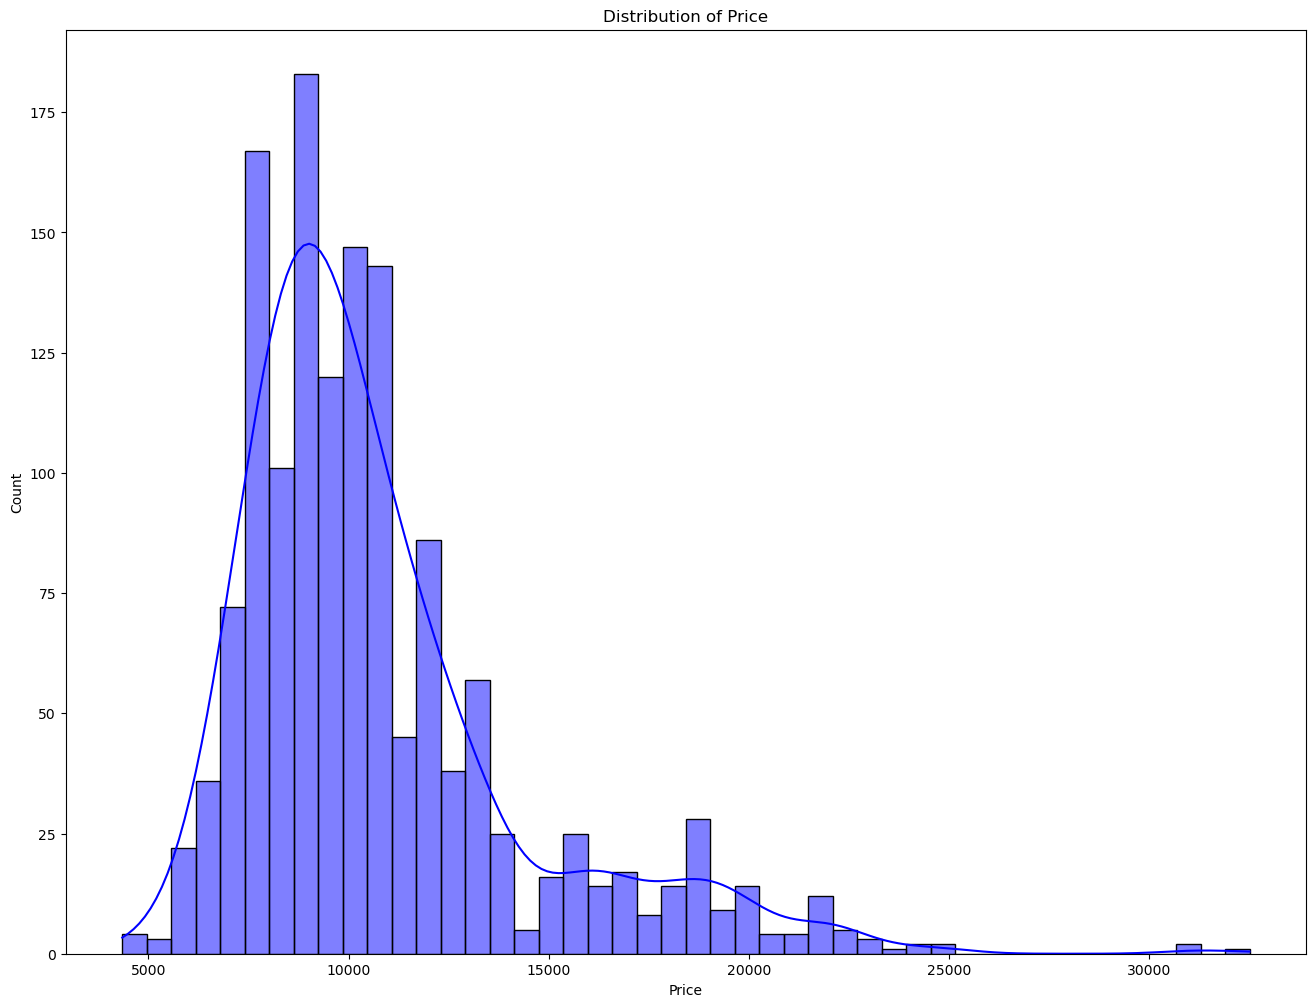

In [104]:
# Plotting distributions
plt.figure(figsize=(16, 12))

# Histogram of Price
sns.histplot(cars['Price'], kde=True, color='blue')
plt.title('Distribution of Price')

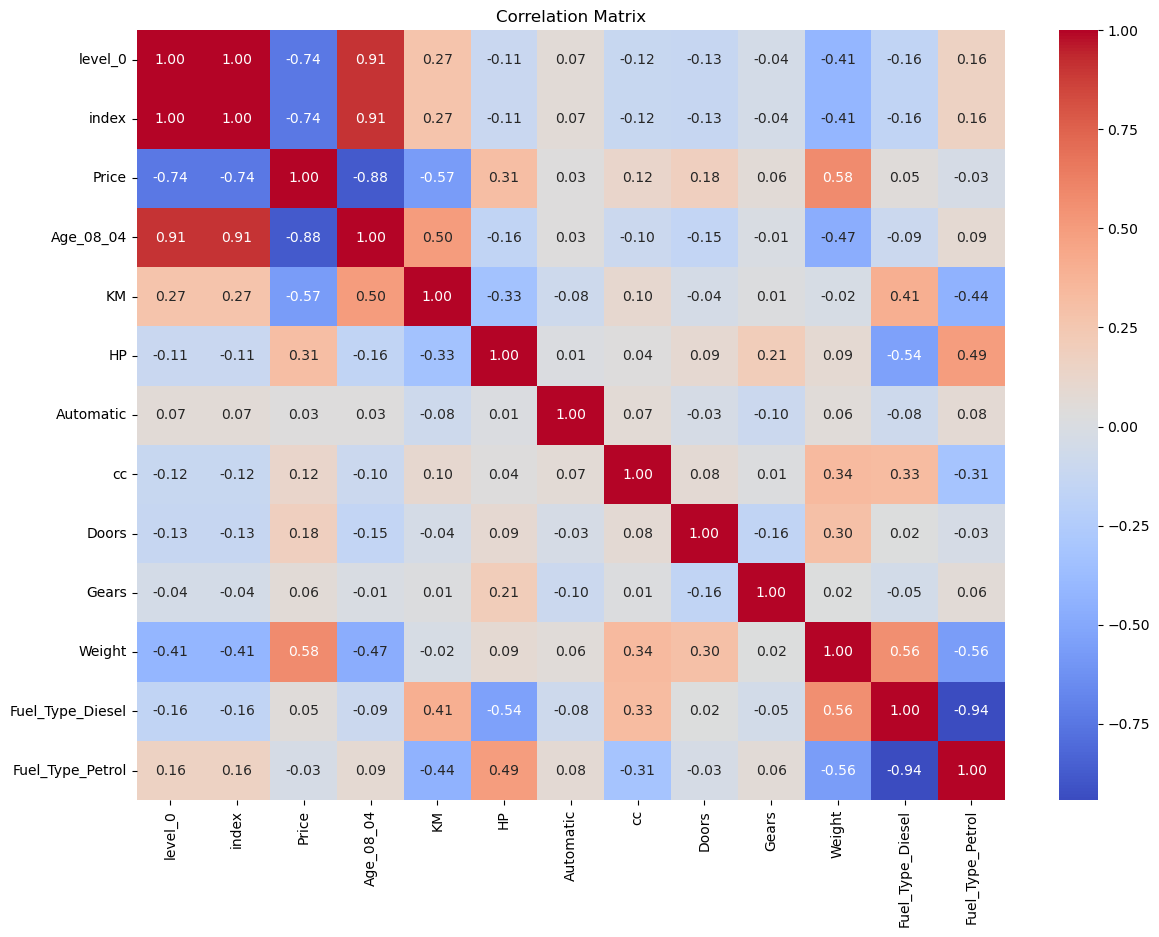

In [105]:
# Heatmap for correlation
plt.figure(figsize=(14,10))
sns.heatmap(cars.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')

plt.show()

##### analysis

In [106]:
#Price ranges from €4,350 to €32,500, with a mean of €10,730.
#Most vehicles are around 56 months old.
#Kilometers driven has a wide range up to 243,000 KM.
#Cars are mostly around 100–110 HP, 1600cc, and weigh around 1070 kg.
#Price is right-skewed, meaning more budget cars than expensive ones.
#High correlation between Weight and Price, Age is negatively correlated with Price.

### 3. Split the data

In [107]:
X=cars.drop(columns=['Price'])
Y=cars['Price']
feature_names = list(X.columns)

In [108]:
X.head()

,level_0,index,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,0,0,23,46986,90,0,2000,3,5,1165,1,0
1,1,1,23,72937,90,0,2000,3,5,1165,1,0
2,2,2,24,41711,90,0,2000,3,5,1165,1,0
3,3,3,26,48000,90,0,2000,3,5,1165,1,0
4,4,4,30,38500,90,0,2000,3,5,1170,1,0


In [109]:
Y.head()

0    13500
1    13750
2    13950
3    14950
4    13750
Name: Price, dtype: int64

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [112]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((1148, 12), (287, 12), (1148,), (287,))

### 4. Build the model

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [114]:
# Dictionary to store results from all models
model_results = {}

# defined a function to train different models according to the set of features we give as input to build different kind of models
def train_and_evaluate_model(features, model_name):
    lr = LinearRegression()
     # here the model is trained with the selected features that are taken from the X_train data
    lr.fit(X_train.iloc[:, features], Y_train)
    
    # predictions made on the training set and stored 
    Yhat_train = lr.predict(X_train.iloc[:, features])
    
    # all the metrics of the model are calculated and stored in form of a dictionary which is then stored in the dictionary which we defined before
    model_results[model_name] = {
        'model': lr,
        'features': [feature_names[i] for i in features],  
        'coefficients': lr.coef_,                          # coefficients for each feature
        'intercept': lr.intercept_,                        
        'rmse': np.sqrt(mean_squared_error(Y_train, Yhat_train)),  # root mean squared error
        'r2': r2_score(Y_train, Yhat_train)                # R² score
    }

# ------------------------
# Model 1: All features
# ------------------------
# all the features from the dataset are being used
train_and_evaluate_model(
    features=list(range(len(feature_names))), 
    model_name="Model_1_All_Features"
)

# ----------------------------------------------------
# Model 2: Top 5 most correlated features with Price
# ----------------------------------------------------
# getting correlation values with 'Price'
correlation = cars.corr(numeric_only=True)['Price'].abs().sort_values(ascending=False)

#on looking on the correlation and on the heatmap the highly correlated features alone are taken 
top_features = ['Weight', 'Age_08_04', 'KM', 'HP']
top_feature_indices = [feature_names.index(f) for f in ['Fuel_Type_Diesel'] + top_features]

train_and_evaluate_model(
    features=top_feature_indices, 
    model_name="Model_2_Top_Correlated"
)

# ---------------------------------------------------------
# Model 3: Optimized based on feature elimination logic
# ---------------------------------------------------------
# less relevent and less correlated features are eliminated 'Doors', 'CC', 'Gears'
reduced_features = ['Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Age_08_04', 'KM', 'HP', 'Automatic', 'Weight']
reduced_indices = [feature_names.index(f) for f in reduced_features]

train_and_evaluate_model(
    features=reduced_indices, 
    model_name="Model_3_Optimized"
)

# all the results stored in the dictionary are printed separetely
for model_name, result in model_results.items():
    print("\n" + "="*50)
    print(f"{model_name}")
    print("="*50)
    print("Features Used:      ", result['features'])
    print("Coefficients:       ", result['coefficients'])
    print("Intercept:          ", result['intercept'])
    print("Root Mean Squared Error (RMSE):", round(result['rmse'], 2))
    print("R_squared_score:           ", round(result['r2'], 4))
    print()



Model_1_All_Features
Features Used:       ['level_0', 'index', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Gears', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']
Coefficients:        [ 3.83610540e-01  3.83610540e-01 -1.45469392e+02 -1.40757098e-02
  2.60517182e+01  4.97942886e+02 -1.59017852e-02  5.70605275e+01
  8.91961839e+02  1.72233218e+01  7.75096432e+02  1.18266809e+03]
Intercept:           -7676.655038228986
Root Mean Squared Error (RMSE): 1326.56
R_squared_score:            0.8621


Model_2_Top_Correlated
Features Used:       ['Fuel_Type_Diesel', 'Weight', 'Age_08_04', 'KM', 'HP']
Coefficients:        [-4.21621977e+02  1.82876199e+01 -1.25250494e+02 -1.74511726e-02
  2.59553990e+01]
Intercept:           -3276.072966531694
Root Mean Squared Error (RMSE): 1350.27
R_squared_score:            0.8571


Model_3_Optimized
Features Used:       ['Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Age_08_04', 'KM', 'HP', 'Automatic', 'Weight']
Coefficients:        [ 8.99412127e+02  1.

##### the interpretation for the training data that we can observe is Model 1 has highest R² (0.8694) and lowest RMSE.Model 2 is simple model using only top correlated variables, with minimal loss in accuracy.Model 3 is slighlty better than Model 2 when we compare R2_Score.Model 3 is best balance between performance and generalization.

### 5.Evaluation using test data

##### for evaluating test data we can use the same function with necessary modifications

In [115]:
# Dictionary to store results from all models
test_model_results = {}

# defined a function to predict for different models according to the set of features we give as input to build different kind of models
def test_data_evaluation_model(features, model_name):
    lr = LinearRegression()
    lr.fit(X_train.iloc[:, features], Y_train)
    
    # predictions made on the test set and stored 
    Yhat_test = lr.predict(X_test.iloc[:, features])
    
    # all the metrics of the model are calculated and stored in form of a dictionary which is then stored in the dictionary which we defined before
    model_results[model_name] = {
        'model': lr,
        'features': [feature_names[i] for i in features],  
        'coefficients': lr.coef_,                          # coefficients for each feature
        'intercept': lr.intercept_,                        
        'rmse': np.sqrt(mean_squared_error(Y_test, Yhat_test)),  # root mean squared error
        'r2': r2_score(Y_test, Yhat_test)                # R² score
    }

# ------------------------
# Model 1: All features
# ------------------------
# all the features from the dataset are being used
test_data_evaluation_model(
    features=list(range(len(feature_names))), 
    model_name="Model_1_All_Features"
)
# ----------------------------------------------------
# Model 2: Top 5 most correlated features with Price
# ----------------------------------------------------

#on looking on the correlation and on the heatmap the highly correlated features alone are taken 
top_features = ['Weight', 'Age_08_04', 'KM', 'HP']
top_feature_indices = [feature_names.index(f) for f in ['Fuel_Type_Diesel'] + top_features]

test_data_evaluation_model(
    features=top_feature_indices, 
    model_name="Model_2_Top_Correlated"
)

# ---------------------------------------------------------
# Model 3: Optimized based on feature elimination logic
# ---------------------------------------------------------
# less relevent and less correlated features are eliminated 'Doors', 'CC', 'Gears'
reduced_features = ['Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Age_08_04', 'KM', 'HP', 'Automatic', 'Weight']
reduced_indices = [feature_names.index(f) for f in reduced_features]

test_data_evaluation_model(
    features=reduced_indices, 
    model_name="Model_3_Optimized"
)
# all the results stored in the dictionary are printed separetely
for model_name, result in model_results.items():
    print("\n" + "="*50)
    print(f"{model_name}")
    print("="*50)
    print("Features Used:      ", result['features'])
    print("Coefficients:       ", result['coefficients'])
    print("Intercept:          ", result['intercept'])
    print("Root Mean Squared Error (RMSE):", round(result['rmse'], 2))
    print("R_squared_score:           ", round(result['r2'], 4))
    print()


Model_1_All_Features
Features Used:       ['level_0', 'index', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Gears', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']
Coefficients:        [ 3.83610540e-01  3.83610540e-01 -1.45469392e+02 -1.40757098e-02
  2.60517182e+01  4.97942886e+02 -1.59017852e-02  5.70605275e+01
  8.91961839e+02  1.72233218e+01  7.75096432e+02  1.18266809e+03]
Intercept:           -7676.655038228986
Root Mean Squared Error (RMSE): 1349.41
R_squared_score:            0.8695


Model_2_Top_Correlated
Features Used:       ['Fuel_Type_Diesel', 'Weight', 'Age_08_04', 'KM', 'HP']
Coefficients:        [-4.21621977e+02  1.82876199e+01 -1.25250494e+02 -1.74511726e-02
  2.59553990e+01]
Intercept:           -3276.072966531694
Root Mean Squared Error (RMSE): 1332.5
R_squared_score:            0.8728


Model_3_Optimized
Features Used:       ['Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Age_08_04', 'KM', 'HP', 'Automatic', 'Weight']
Coefficients:        [ 8.99412127e+02  1.3

##### inference from the above model is 
##### model 1 has moderate error and almost 86% of variance explained
##### model 2 has highest r2 score and lowest RMSE value and is mosr efficient model
##### model 3 is well-balanced, excluding irrelevant features while maintaining strong performance
##### model 2, with just 5 well-chosen features, outperforms the full-feature model. This emphasizes the power of correlation-based feature selection
##### model 1 may suffer from multicollinearity due to many similar/related features

In [117]:
from sklearn.linear_model import Lasso, Ridge

### Lasso regression

In [118]:
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, Y_train)
Y_hat_lasso = lasso.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(Y_test, Y_hat_lasso))
lasso_r2 = r2_score(Y_test, Y_hat_lasso)
lasso.coef_, lasso.intercept_, lasso_rmse, lasso_r2

(array([ 7.63012803e-01,  1.78602588e-16, -1.45217405e+02, -1.41541776e-02,
         2.55964687e+01,  4.67342500e+02, -1.08630899e-02,  5.32717631e+01,
         8.66369039e+02,  1.73573726e+01,  5.89833854e+02,  1.03043190e+03]),
 -7488.700021825338,
 1346.8211707712953,
 0.8700492995521409)

In [119]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, Y_train)
Y_hat_ridge = ridge.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(Y_test, Y_hat_ridge))
ridge_r2 = r2_score(Y_test, Y_hat_ridge)
ridge.coef_, ridge.intercept_, ridge_rmse, ridge_r2

(array([ 3.82640897e-01,  3.82640737e-01, -1.45323988e+02, -1.41462991e-02,
         2.58253715e+01,  4.83690731e+02, -1.32952179e-02,  5.56546915e+01,
         8.74651998e+02,  1.72753827e+01,  6.45815264e+02,  1.06692053e+03]),
 -7506.5077835893535,
 1347.9686610839508,
 0.8698277694827223)

##### model 2 performs better than lasso and ridge models. lasso is slightly better than ridge model 

### interview questions

##### 1. normalization is used to rescale features to a range (usually 0 to 1) and given by the formula (X - X_min) / (X_max - X_min) whereas standardization transforms data to have zero mean and unit variance and is given by the formula (X - μ) / σ . It is impotant because Algorithms like KNN, SVM, and gradient descent-based models are sensitive to magnitude.Features with larger scales dominate the model learning process.Helps improve training speed, model accuracy, and interpretability.

##### 2. To address multicollinearity we can remove the features that are highly correlated.We can also perfrom principal component analysis when the dimentionality is reduced.also we can perform standardization. We can also use regularization techniques such as ridges and lasso which are great tools for handling it without dropping features